In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # IMPORTING LIBRARIES

In [48]:
train=pd.read_csv('/content/Titanic_train.csv')
test=pd.read_csv('/content/Titanic_test.csv') #LOADING DATASET

In [49]:
train.head() #checking training dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
# @title PERFORMING EDA
test.head()  #checking testing dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [51]:
#checking no of rows and columns
print('train- rows and columns :', train.shape) # we got 891 rows and 12 column.
print('test- rows and columns:',test.shape)    # we got 418 rows and 11 column near about halfs rows compared to train dataset

train- rows and columns : (891, 12)
test- rows and columns: (418, 11)


In [52]:
#checking data types and null values
train.info()  # we got null values in age and cabin column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [53]:
test.info()  # we have null values in age and cabin.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [54]:
# Analysing dataset ,had to join dataset by removing survived column
# As it is  target column(y column)
target_column=train['Survived']  # Storing survived column seprately as target.
train=train.drop('Survived',axis=1) # Removing survived column.

In [55]:
# Joining both dataset so that EDA can be performed on it and so data cleaning.
df=pd.concat([train,test],ignore_index=True)

In [56]:
df # Joined dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [57]:
df.shape #check df no of rows and columns.

(1309, 11)

In [58]:
df.info() #checking datatypes and values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [59]:
# Null values are present in age and cabin column.
# Age columns null percentage is 20% and cabin is 77.4%
df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,1014


In [60]:
df=df.drop('Cabin',axis=1)

According to normal practices missing values between 6-45% we try to replace and more than 50% we drop the column.

Dropping cabin column.

For Age column firstly visualization and then only necessary changes can be done on it.

In [61]:
df.shape #Successfully dropped the column cabin.

(1309, 10)

Text(0.5, 1.0, 'Spread of ages')

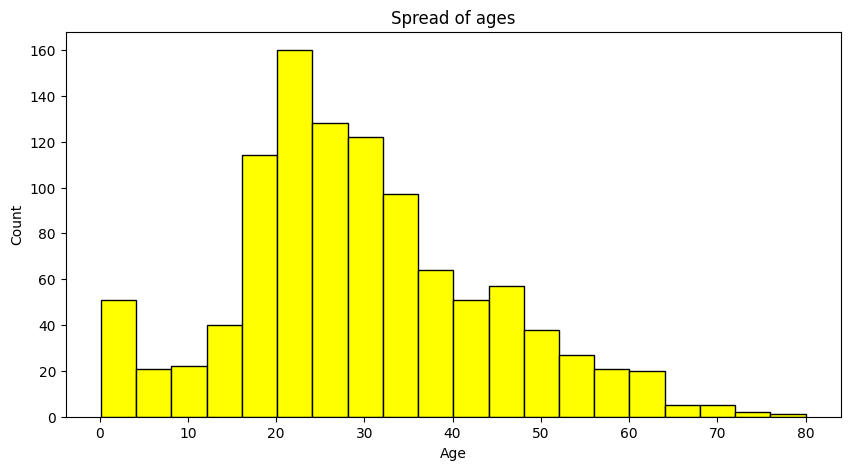

In [62]:
# For Age column lets visualize age distribution.
plt.figure(figsize=(10,5))
plt.hist(df['Age'],color='yellow',edgecolor='black',bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Spread of ages')

In [63]:
# Basic statistics.
df.describe()  # Age-mean->29.88

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [64]:
df.Pclass.value_counts()

,count
Pclass,
3,709
1,323
2,277


In [65]:
df.Age.median()  # Replacing missing values of age with median.

28.0

In [66]:
df.Age.fillna(28,inplace=True)

<ipython-input-66-751219d1e91f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(28,inplace=True)


In [67]:
df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1
Embarked,2


Succefully replaced age column missing values.

 Left with 1 missing value in fare and 2 in embarked column.

Text(0.5, 1.0, 'Spread of ages')

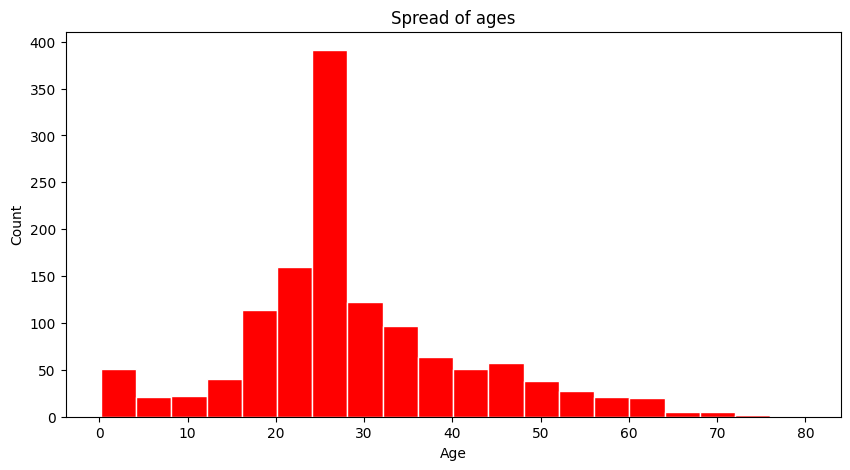

In [68]:
plt.figure(figsize=(10,5))
plt.hist(df['Age'],color='red',edgecolor='white',bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Spread of ages')

In [69]:
# Mean value in fare
df.Fare.fillna(df.Fare.mean(),inplace=True)

<ipython-input-69-b6272ba6200f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Fare.fillna(df.Fare.mean(),inplace=True)


In [70]:
# For Embarked missing values, forward fill method is used.
df.Embarked.fillna(method='ffill',inplace=True)

<ipython-input-70-fdef40cb5c0b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Embarked.fillna(method='ffill',inplace=True)
<ipython-input-70-fdef40cb5c0b>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.Embarked.fillna(method='ffill',inplace=True)


In [71]:
df.isnull().sum()  #Successfully got rid of missing values.

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [72]:
df.describe(include='object') # 3 unique values in embarked columns and 2 in sex column.

,Name,Sex,Ticket,Embarked
count,1309,1309,1309,1309
unique,1307,2,929,3
top,"Connolly, Miss. Kate",male,CA. 2343,S
freq,2,843,11,914


Text(0.5, 1.0, 'Count of each embarked')

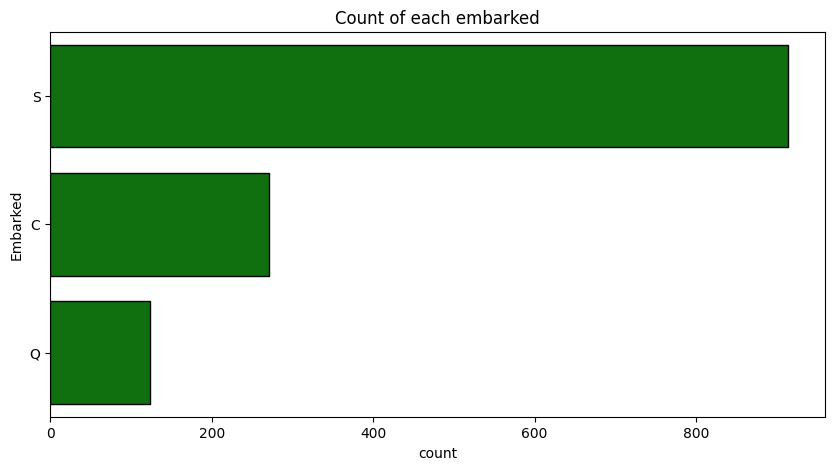

In [73]:
plt.figure(figsize=(10,5))
sns.countplot(df['Embarked'],color='green',edgecolor='black')
plt.title('Count of each embarked')

<Axes: xlabel='count', ylabel='Sex'>

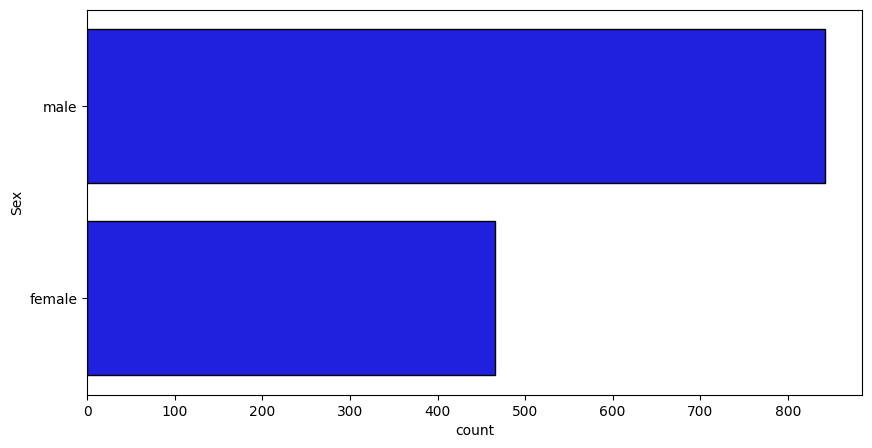

In [74]:
plt.figure(figsize=(10,5))
sns.countplot(df['Sex'],color='blue',edgecolor='black')

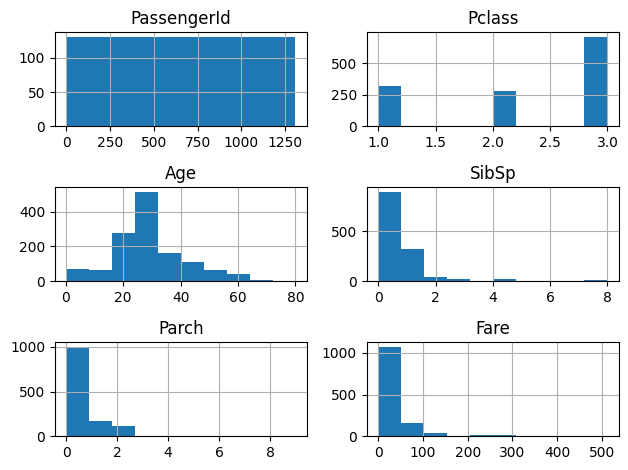

In [75]:
df.hist()
plt.tight_layout()

<Axes: ylabel='Age'>

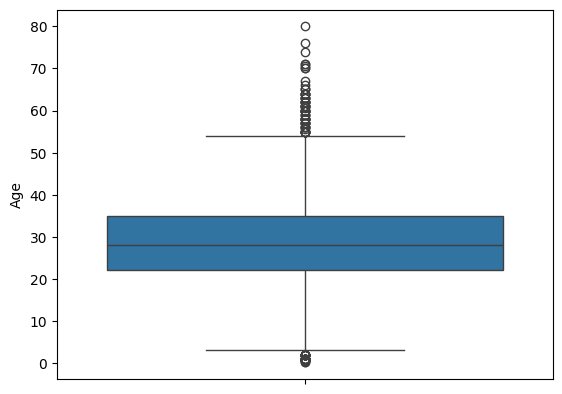

In [76]:
sns.boxplot(df['Age'])

<Axes: >

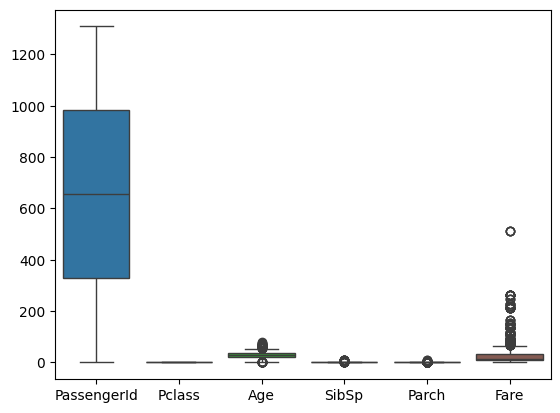

In [77]:
sns.boxplot(df)

In [78]:
# Transforming data from categorical data to numerical data using one hot encoding
# 2 column to transform 1) embarked 2) sex
from sklearn.preprocessing import OneHotEncoder
embark_dummy=pd.get_dummies(df['Embarked'])
df=pd.concat([df,embark_dummy],axis=1)
df=df.drop('Embarked',axis=1) # for embarked column

In [80]:
df=df.drop('PassengerId',axis=1) # dropped unnecessary column

In [81]:
sex_dummies=pd.get_dummies(df['Sex'])
df=pd.concat([df,sex_dummies],axis=1)
df=df.drop('Sex',axis=1) # for sex column

In [82]:
df.head()  #removing unnecessary columns like - passengerid, name

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,C,Q,S,female,male
0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,False,True,False,True
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,False,True,False
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True,True,False
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True,True,False
4,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,False,True,False,True


In [83]:
df=df.drop('Name',axis=1)

In [84]:
df.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,C,Q,S,female,male
0,3,22.0,1,0,A/5 21171,7.2500,False,False,True,False,True
1,1,38.0,1,0,PC 17599,71.2833,True,False,False,True,False
2,3,26.0,0,0,STON/O2. 3101282,7.9250,False,False,True,True,False
3,1,35.0,1,0,113803,53.1000,False,False,True,True,False
4,3,35.0,0,0,373450,8.0500,False,False,True,False,True


In [85]:
df=df.drop('Ticket',axis=1)

In [86]:
df.head()

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,3,22.0,1,0,7.2500,False,False,True,False,True
1,1,38.0,1,0,71.2833,True,False,False,True,False
2,3,26.0,0,0,7.9250,False,False,True,True,False
3,1,35.0,1,0,53.1000,False,False,True,True,False
4,3,35.0,0,0,8.0500,False,False,True,False,True


In [87]:
# Feature engineering
family_size=df['SibSp']+df['Parch']+1
df['family_size']=family_size
df=df.drop(['SibSp','Parch'],axis=1)

In [88]:
df.head()

,Pclass,Age,Fare,C,Q,S,female,male,family_size
0,3,22.0,7.2500,False,False,True,False,True,2
1,1,38.0,71.2833,True,False,False,True,False,2
2,3,26.0,7.9250,False,False,True,True,False,1
3,1,35.0,53.1000,False,False,True,True,False,2
4,3,35.0,8.0500,False,False,True,False,True,1


In [89]:
df[['C','Q','S','female','male']]=df[['C','Q','S','female','male']].astype(int)

In [90]:
df.head()

,Pclass,Age,Fare,C,Q,S,female,male,family_size
0,3,22.0,7.2500,0,0,1,0,1,2
1,1,38.0,71.2833,1,0,0,1,0,2
2,3,26.0,7.9250,0,0,1,1,0,1
3,1,35.0,53.1000,0,0,1,1,0,2
4,3,35.0,8.0500,0,0,1,0,1,1


In [91]:
from sklearn.preprocessing import RobustScaler  # scaling using robustscaler as it does not affect binary features(0,1).
scaler=RobustScaler()

In [92]:
df_scaled= scaler.fit_transform(df)

In [93]:
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)

In [94]:
df_scaled.head()

,Pclass,Age,Fare,C,Q,S,female,male,family_size
0,0.0,-0.461538,-0.308146,0.0,0.0,0.0,0.0,0.0,1.0
1,-2.0,0.769231,2.430755,1.0,0.0,-1.0,1.0,-1.0,1.0
2,0.0,-0.153846,-0.279274,0.0,0.0,0.0,1.0,-1.0,0.0
3,-2.0,0.538462,1.652999,0.0,0.0,0.0,1.0,-1.0,1.0
4,0.0,0.538462,-0.273927,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
df_scaled.shape   # Total 1309 rows and 9 columns.

(1309, 9)

In [96]:
target_column.shape # 891 rows and 1 column in target column which contains survive data that is y.

(891,)

In [97]:
# Splitting old concated data to it original dimensions
new_train_data=df_scaled.iloc[:891,]  # this will be our x , target will be our y
new_train_data

,Pclass,Age,Fare,C,Q,S,female,male,family_size
0,0.0,-0.461538,-0.308146,0.0,0.0,0.0,0.0,0.0,1.0
1,-2.0,0.769231,2.430755,1.0,0.0,-1.0,1.0,-1.0,1.0
2,0.0,-0.153846,-0.279274,0.0,0.0,0.0,1.0,-1.0,0.0
3,-2.0,0.538462,1.652999,0.0,0.0,0.0,1.0,-1.0,1.0
4,0.0,0.538462,-0.273927,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
886,-1.0,-0.076923,-0.062201,0.0,0.0,0.0,0.0,0.0,0.0
887,-2.0,-0.692308,0.664941,0.0,0.0,0.0,1.0,-1.0,0.0
888,0.0,0.000000,0.384778,0.0,0.0,0.0,1.0,-1.0,3.0
889,-2.0,-0.153846,0.664941,1.0,0.0,-1.0,0.0,0.0,0.0


In [98]:
new_test_data=df_scaled.iloc[891:,]  #New testing data
new_test_data

,Pclass,Age,Fare,C,Q,S,female,male,family_size
891,0.0,0.500000,-0.283372,0.0,1.0,-1.0,0.0,0.0,0.0
892,0.0,1.461538,-0.318839,0.0,0.0,0.0,1.0,-1.0,1.0
893,-1.0,2.615385,-0.203886,0.0,1.0,-1.0,0.0,0.0,0.0
894,0.0,-0.076923,-0.247729,0.0,0.0,0.0,0.0,0.0,0.0
895,0.0,-0.461538,-0.092676,0.0,0.0,0.0,1.0,-1.0,2.0
...,...,...,...,...,...,...,...,...,...
1304,0.0,0.000000,-0.273927,0.0,0.0,0.0,0.0,0.0,0.0
1305,-2.0,0.846154,4.039736,1.0,0.0,-1.0,1.0,-1.0,0.0
1306,0.0,0.807692,-0.308146,0.0,0.0,0.0,0.0,0.0,0.0
1307,0.0,0.000000,-0.273927,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
# Splitting data
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(new_train_data,target_column,test_size=0.2,random_state=42)

In [100]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [101]:
# @title HYPERPARAMETER TUNNING AND CV
params={
    'n_estimators':[90,110,150],
    'learning_rate':[0.5,0.6,0.7,0.9,1],
    'lambda':[1,2,3],
    'max_depth':[3,5,7,11,15],
}

In [102]:
grid=GridSearchCV(XGBClassifier(),param_grid=params,verbose=1,cv=5)  # Gridsearch to get best parameters.
grid.fit(x_train,y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'lambda': [1, 2, 3],
                         'learning_rate': [0.5, 0.6, 0.7, 0.9, 1],
                         'max_depth': [3, 5, 7, 11, 15],
                         'n_estimators': [90, 110, 150]},
             verbose=1)

In [103]:
grid.best_params_  # Got best parameters from gridsearch

{'lambda': 3, 'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 90}

In [105]:
# @title MODEL BUILDING
xgb=XGBClassifier(reg_lambda=3,learning_rate=0.5,max_depth=3,n_estimators=90)  #building model using best parameters.
xgb.fit(x_train,y_train)  #fitting model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=90, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [106]:
y_pred=xgb.predict(x_test)   #predicting on x_test

In [107]:
# @title MODEL EVALUATION
print('Train Accuracy: ',xgb.score(x_train,y_train))
print('Test Accuracy: ',xgb.score(x_test,y_test))
print(classification_report(y_test,y_pred))

Train Accuracy:  0.9213483146067416
Test Accuracy:  0.8212290502793296
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [108]:
y_preds=xgb.predict(new_test_data)    #Testing on testing data set.

In [109]:
y_preds   #successfully predicted.

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [110]:
# @title PERFORMING LIGHTGBM METHOD

In [111]:
import lightgbm as lgb #importing lgbm library

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [112]:
#hypertunning and cross validation
paramss={
    'n_estimators':[90,110,150],
    'learning_rate':[0.5,0.6,0.7,0.9,1],
    'lambda':[1,2,3],
    'max_depth':[3,5,7,11,15],
}

In [113]:
#finding best parameter using gridsearch.
grids=GridSearchCV(lgb.LGBMClassifier(),param_grid=paramss,verbose=1,cv=5)
grids.fit(x_train,y_train)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'lambda': [1, 2, 3],
                         'learning_rate': [0.5, 0.6, 0.7, 0.9, 1],
                         'max_depth': [3, 5, 7, 11, 15],
                         'n_estimators': [90, 110, 150]},
             verbose=1)

In [114]:
grids.best_params_   #getting best parameters.

{'lambda': 3, 'learning_rate': 0.6, 'max_depth': 3, 'n_estimators': 90}

In [115]:
#fitting best parameters to lgbm model and training model
lgbm=lgb.LGBMClassifier(reg_lambda=3,learning_rate=0.6,max_depth=3,n_estimators=90)
lgbm.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(learning_rate=0.6, max_depth=3, n_estimators=90, reg_lambda=3)

In [116]:
y_predd=lgbm.predict(x_test) #predicitng on x_test

In [117]:
# @title MODEL EVALUATION
print('Train Accuracy: ',lgbm.score(x_train,y_train))
print('Test Accuracy: ',lgbm.score(x_test,y_test))
print(classification_report(y_test,y_pred))

Train Accuracy:  0.9199438202247191
Test Accuracy:  0.8156424581005587
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [121]:
y_main_test=lgbm.predict(new_test_data)  #Predictions on testing data

In [122]:
y_main_test  #Successfully tested testing data.

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

**COMPARATIVE ANALYSIS**

Xgbm training score-0.92
Xgbm testing score-0.82
Lgbm training score-0.91
Lgbm testing score-0.81

1) Accuracy, precision, recall of XGBM is more  as compared to LGBM, but not much difference.

2) XGB Models are overfitted compared to LGB Models.

**XGBoost(XGBM)**

*Strengths:*

1->Accuracy: XGBoost often delivers highly accurate results due to its advanced implementation of gradient boosting.

2->Robustness: It handles a variety of data types and is robust to overfitting through techniques like regularization.

3->Training Time: Despite optimizations, XGBoost can be slower to train compared to some other models, especially on large datasets.

4->Memory Usage: It can consume a lot of memory, which might be a constraint for very large datasets.

5->Complexity: XGBoost's numerous parameters and settings can make it complex to configure optimally without sufficient experience.


**LightGBM(LGBM)**

*Strengths:*

1->Speed: LightGBM is typically faster than XGBoost, especially with large datasets, due to its optimized histogram-based algorithms.

2->Efficiency: It consumes less memory and is designed to handle large datasets more efficiently.

3->Accuracy: LightGBM provides comparable accuracy to XGBoost but achieves it faster.

4->Large Scale: It is particularly effective for very large datasets and high-dimensional data.

*Weaknesses:*

1->Overfitting: LightGBM can sometimes be more prone to overfitting, particularly with small datasets or insufficient regularization.

2->Complexity of Customization: While LightGBM is efficient, it can be less intuitive to customize for specific tasks compared to XGBoost.

3->Sparse Data Handling: Although LightGBM can handle sparse data, it is generally less efficient at this compared to XGBoost.

-->>XGBoost is favored for its robustness, accuracy, and comprehensive feature set but can be slower and more memory-intensive.

-->>LightGBM is preferred for its speed, efficiency, and ability to handle large-scale datasets but might require more care to avoid overfitting and might be less straightforward to customize.

In [ ]:
#THANK YOU!!!